Importing a bunch of libraries (Don't know if I need them all)

In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import noaa_coops as nc
import numpy as np

Create a Bouy Class. This will grab the data, clean it, and return an object with a dataframe. Them we can use methods to print out whatever

In [2]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import noaa_coops as nc
import numpy as np

class Bouy:
    def __init__(self, name, bouy_id):
        print('Setting Bouy ID')
        self.id = bouy_id
        self.name = name
    def get_data(self):
        url = "https://www.ndbc.noaa.gov/data/realtime2/" + self.id + '.txt'
        self.data = pd.read_csv(url,delim_whitespace=True)
        
    def clean_data(self):
        #Delete First Row First
        self.data = self.data.drop([0])
        #Delete other bad values; This drops the whole row so could be better
        #Replace MM with NaN
        self.data = self.data.replace('MM', np.nan)
        #Delete Columns that don't exist
        self.data = self.data.dropna(axis=1, how='all')
        #Clean Bouy DataTypes
        self.data['#YY'] = self.data['#YY'].astype(str)
        self.data['MM'] = self.data['MM'].astype(str)
        self.data['DD'] = self.data['DD'].astype(str)
        self.data['hh'] = self.data['hh'].astype(str)
        self.data['mm'] = self.data['mm'].astype(str)
        for (columnName, columnData) in self.data.iteritems():
            if columnName not in ('#YY', 'MM', 'DD', 'hh', 'mm'):
                self.data[columnName] = pd.to_numeric(self.data[columnName])
        #Rename Columns and convert to datetime
        self.data = self.data.rename(columns={"#YY": "year", "MM": "month", "DD": "day", "hh": "hours", "mm": "minutes",})
        self.data['datetime'] = pd.to_datetime(self.data[['year', 'month', 'day', 'hours', 'minutes']])
        datetime_temp = self.data['datetime']
        self.data.drop(labels=['datetime'], axis=1,inplace = True)
        self.data.insert(0, 'datetime', datetime_temp)
        self.data.drop(labels=['year', 'month', 'day', 'hours', 'minutes'], axis=1,inplace = True)
        self.data = self.data.set_index('datetime')
        #set to local time
        self.data=self.data.tz_localize('UTC')
        self.data = self.data.tz_convert('America/Los_Angeles')
        #Change WSPD to MPH and WVHT to Feet
        self.data['WVHT'] = self.data['WVHT'] * 3.28084
        self.data['WSPD'] = self.data['WSPD'] * 2.23694
        
    



WDIR: Wind Direction (From True North)
WSPD: Wind Speed (m/s)
GST: Peak 5 or 8 second gust speed (m/s)
WVHT: Significant Wave Height (meters)
DPD: Dominant Wave Period (seconds)
APD: Average wave Period (seconds)
MWD: Direction in which waves at the dominant period are coming
PRES: Sea Level Pressure (hPa)
ATMP: Air Temp (celcius)
WTMP: Sea Surface Temp (celcius)
DEWP: Dewpoint Temperature
VIS: station visibility (nautical miles)
PTDY: Pressure Tendency
TIDE: Water level in feet above or below Mean Lower Low Water

Create a scripps_pier bouy

In [3]:
scripps_pier = Bouy('scripps_pier', 'LJPC1') #46254 is off the scripps pier, LJPC1 is on the pier, 46258 is in the trough, 46225 is in Scripps Canyon
scripps_trough = Bouy('scripps_trough', '46254')

Setting Bouy ID
Setting Bouy ID


Get Data

In [4]:
scripps_pier.get_data()
scripps_trough.get_data()

    #YY  MM  DD  hh  mm  WDIR WSPD   GST WVHT  DPD  APD   MWD PRES  ATMP  \
0   #yr  mo  dy  hr  mn  degT  m/s   m/s    m  sec  sec  degT  hPa  degC   
1  2022  02  24  00  20   290  7.7  10.3  1.9    7   MM    MM   MM    MM   
2  2022  02  23  23  20   290  8.2  10.8  2.1    7   MM    MM   MM    MM   
3  2022  02  23  22  20   290  8.8  11.8  2.0    7   MM    MM   MM    MM   
4  2022  02  23  21  20   280  9.3  12.4  2.0    6   MM    MM   MM    MM   

   WTMP  DEWP  VIS PTDY TIDE  
0  degC  degC  nmi  hPa   ft  
1    MM    MM   MM   MM   MM  
2    MM    MM   MM   MM   MM  
3    MM    MM   MM   MM   MM  
4    MM    MM   MM   MM   MM  
    #YY  MM  DD  hh  mm  WDIR WSPD  GST WVHT  DPD  APD   MWD PRES  ATMP  WTMP  \
0   #yr  mo  dy  hr  mn  degT  m/s  m/s    m  sec  sec  degT  hPa  degC  degC   
1  2022  02  24  00  26    MM   MM   MM  2.0    8  5.4   281   MM    MM  15.1   
2  2022  02  23  23  56    MM   MM   MM  2.0    7  5.3   284   MM    MM  15.1   
3  2022  02  23  23  26    MM   M

Clean Data

In [5]:
scripps_pier.clean_data()
scripps_trough.clean_data()

                      WDIR  WSPD   GST  WVHT  DPD
datetime                                         
2022-02-24 00:20:00  290.0   7.7  10.3   1.9  7.0
2022-02-23 23:20:00  290.0   8.2  10.8   2.1  7.0
2022-02-23 22:20:00  290.0   8.8  11.8   2.0  7.0
2022-02-23 21:20:00  280.0   9.3  12.4   2.0  6.0
2022-02-23 20:20:00  290.0   9.8  11.8   2.0  7.0
                     WVHT  DPD  APD    MWD  WTMP
datetime                                        
2022-02-24 00:26:00   2.0  8.0  5.4  281.0  15.1
2022-02-23 23:56:00   2.0  7.0  5.3  284.0  15.1
2022-02-23 23:26:00   2.1  6.0  5.5  284.0  15.1
2022-02-23 22:56:00   2.2  7.0  5.5  288.0  15.2
2022-02-23 22:26:00   2.3  7.0  5.6  287.0  15.2


Turn into Daily Averages

array([<AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>], dtype=object)

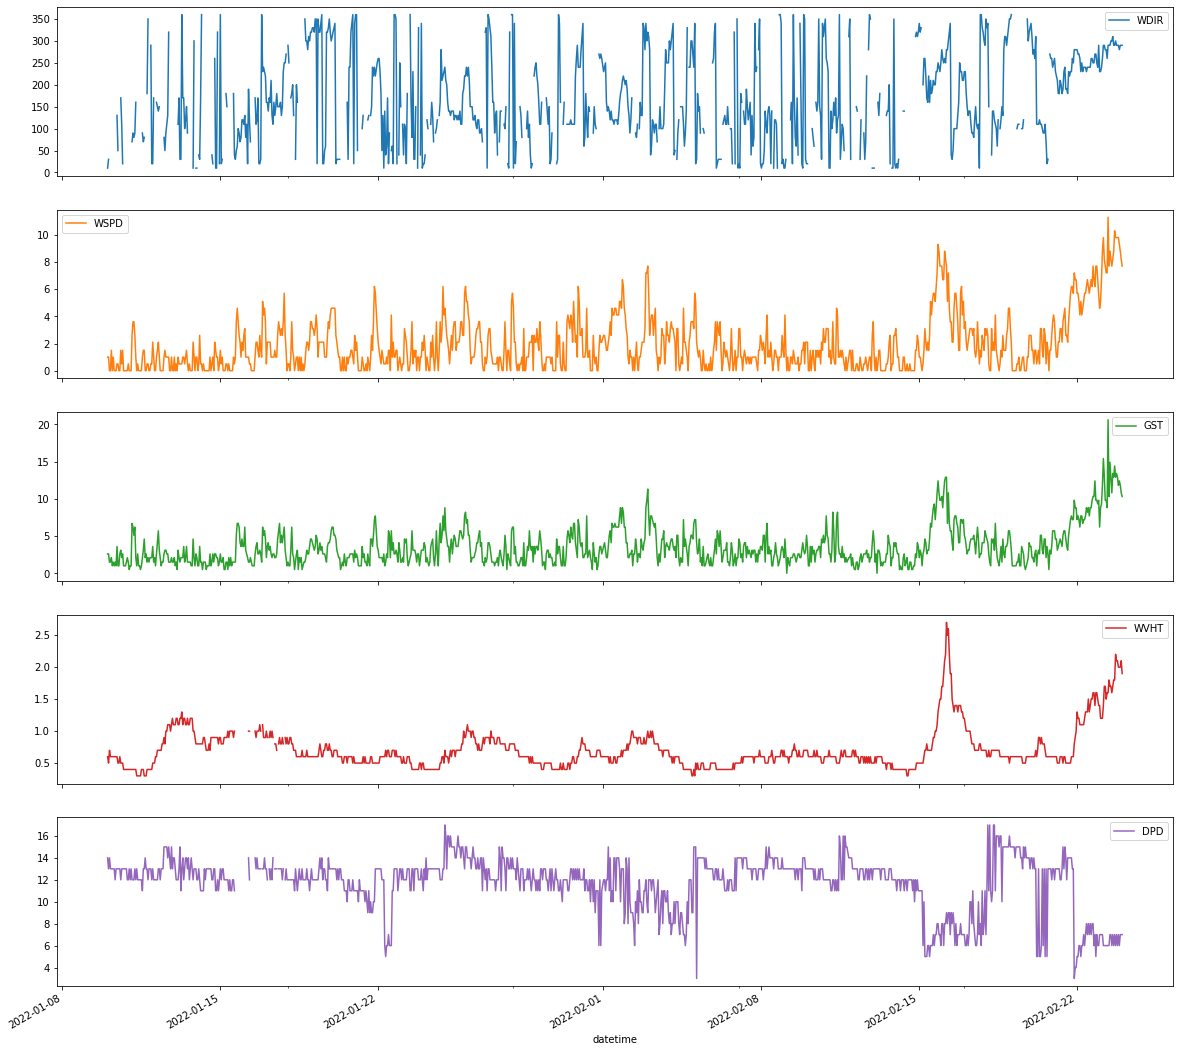

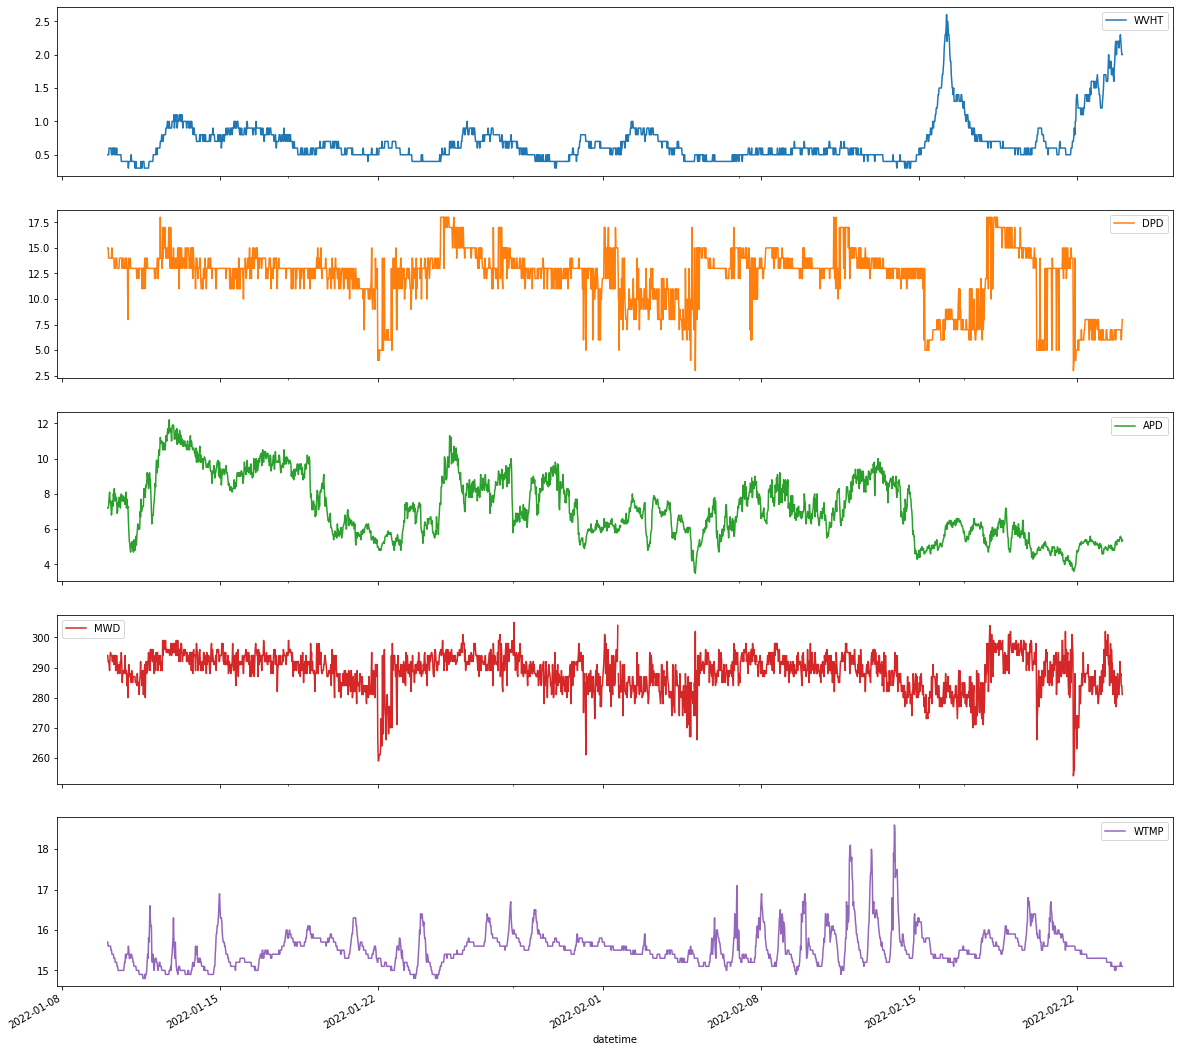

In [6]:
scripps_pier.data.plot(subplots=True, figsize=(20, 20))
scripps_trough.data.plot(subplots=True, figsize=(20, 20))